In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans as KMeans

In [5]:
iris = load_iris()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [7]:
y = iris["target"]
X = iris.drop(["target"], axis=1)

In [9]:
wcss = []
  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
      
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

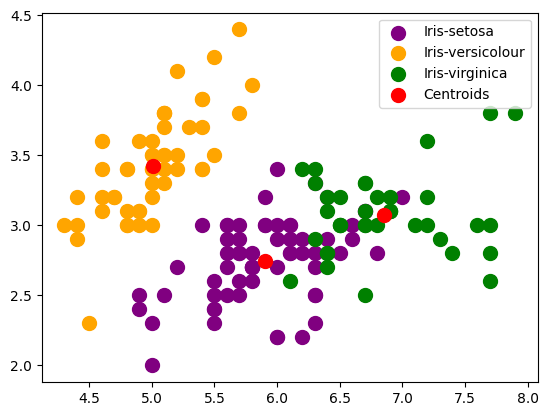

In [10]:
cols = iris.columns
plt.scatter(X.loc[y_kmeans == 0, cols[0]],
            X.loc[y_kmeans == 0, cols[1]],
            s=100, c='purple',
            label='Iris-setosa')
plt.scatter(X.loc[y_kmeans == 1, cols[0]],
            X.loc[y_kmeans == 1, cols[1]],
            s=100, c='orange',
            label='Iris-versicolour')
plt.scatter(X.loc[y_kmeans == 2, cols[0]],
            X.loc[y_kmeans == 2, cols[1]],
            s=100, c='green',
            label='Iris-virginica')
  
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='Centroids')
  
plt.legend()

$dist(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}$

где $\mathbf{x}$ и $\mathbf{y}$ - это две точки в $d$-мерном пространстве.

$centroid_j^{(t+1)} = \frac{1}{|S_j^{(t+1)}|} \sum_{i \in S_j^{(t+1)}} x_i$

Где:

- $centroid_j^{(t+1)}$ - центроид кластера $j$ после $t+1$ итерации
- $S_j^{(t+1)}$ - множество примеров, отнесенных к кластеру $j$ на $t+1$ итерации
- $x_i$ - координаты примера $i$

ОСТАВЬ НА ВТОРОЙ ДАТАСЕТ

In [13]:
X, y = make_blobs(n_samples=400, random_state=2)

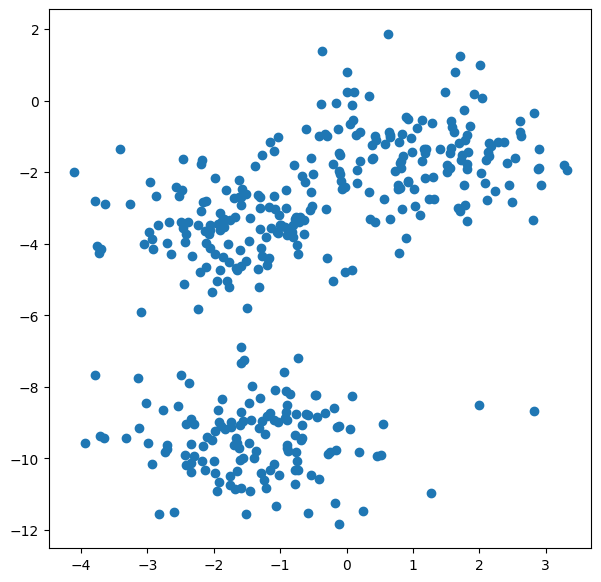

In [14]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])